In [ ]:
# ID MT385497.1
# https://www.ncbi.nlm.nih.gov/nuccore/MT385497.1?report=fasta&log$=seqview


#### Outline
+ Reading
+ Sequence Analysis
+ Freq N,AA,GC,AT content
+ Protein Synthesis


In [2]:
from Bio import SeqIO

In [3]:
# Reading fasta file
covid_record = SeqIO.read("Covid_sequence_MT385497.fasta","fasta")


In [4]:
covid_record

SeqRecord(seq=Seq('CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAA...TTT'), id='MT385497.1', name='MT385497.1', description='MT385497.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB017/2020 ORF1ab polyprotein (ORF1ab), ORF1a polyprotein (ORF1ab), surface glycoprotein (S), ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), ORF6 protein (ORF6), ORF7a protein (ORF7a), ORF7b (ORF7b), ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 protein (ORF10) genes, complete cds', dbxrefs=[])

In [5]:
# Seq
covid_dna = covid_record.seq

In [6]:
covid_dna

Seq('CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAA...TTT')

In [7]:
# lenght of DNA
len(covid_dna)

29803

In [8]:
# Transcription
# DNA to mRNA
covid_mrna = covid_dna.transcribe()

In [9]:
covid_mrna

Seq('CAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAA...UUU')

In [10]:
# Translation
# mRNA to AA
covid_protein = covid_mrna.translate()

/Users/kdonkor/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [11]:
covid_protein

Seq('QVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVYL...N*F')

### Sequence Analysis
+ Frequency of N/Bases and Amino Acid

In [12]:
# Check for N or Bases
from collections import Counter

In [13]:
covid_ncount = Counter(covid_dna)

In [14]:
covid_ncount

Counter({'C': 4818, 'A': 7825, 'G': 5136, 'T': 8348, 'N': 3676})

In [15]:
# Plot
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

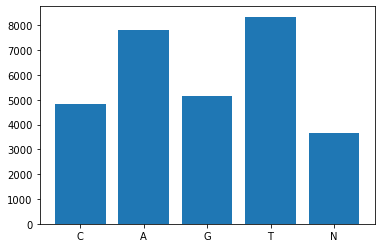

In [16]:
plt.bar(covid_ncount.keys(),covid_ncount.values())

In [17]:
# Molecular Weight
from Bio.SeqUtils import molecular_weight

In [20]:
#molecular weight will not be calculated with N so you have the replace N with emptiness
molecular_weight(str(covid_dna).replace('N',""))

8074343.12620062

# DNA composition
+ GC Content
+ AT Content

In [21]:
from Bio.SeqUtils import GC,GC123,GC_skew,xGC_skew

In [ ]:
# GC Content

In [22]:
GC(covid_dna)

33.399322215884304

In [23]:
# AT Cotent
def at_content(seq):
    result = float(seq.count('A') + seq.count('T'))/len(seq)*100
    return result

In [24]:
at_content(covid_dna)

54.26634902526592

In [25]:
# GC Skew
# Lagging or leading strand
GC_skew(covid_dna)

[-0.16279069767441862,
 -0.043478260869565216,
 0.0,
 0.19230769230769232,
 0.0,
 0.16981132075471697,
 0.1836734693877551,
 0.045454545454545456,
 -0.125,
 0.2558139534883721,
 -0.16129032258064516,
 0.07317073170731707,
 0.23809523809523808,
 -0.07317073170731707,
 0.14285714285714285,
 0.14285714285714285,
 -0.0967741935483871,
 0.36,
 -0.045454545454545456,
 0.05263157894736842,
 0.024390243902439025,
 0.3888888888888889,
 0.1891891891891892,
 0.1794871794871795,
 -0.07317073170731707,
 0.1282051282051282,
 -0.06976744186046512,
 0.3333333333333333,
 0.09523809523809523,
 0.2777777777777778,
 1.0,
 0.6923076923076923,
 0.0,
 0.5,
 0.12195121951219512,
 0.15,
 -0.05555555555555555,
 -0.030303030303030304,
 0.29411764705882354,
 0.030303030303030304,
 -0.23529411764705882,
 0.38095238095238093,
 0.17073170731707318,
 -0.02857142857142857,
 0.2777777777777778,
 -0.2777777777777778,
 0.023255813953488372,
 -0.23529411764705882,
 -0.058823529411764705,
 -0.02564102564102564,
 0.0625,
 -

In [11]:
xGC_skew(covid_dna)

In [26]:
from Bio.SeqUtils import MeltingTemp as mt 

In [28]:
mt.Tm_GC(covid_dna, strict=False)

75.8570195680357

In [29]:
# Check for number of amino acids 
covid_pro_freq = Counter(covid_protein)

<BarContainer object of 22 artists>

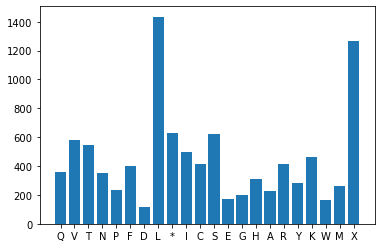

In [30]:
plt.bar(covid_pro_freq.keys(),covid_pro_freq.values())

In [31]:
# 5 most common AA
Counter(covid_protein).most_common(5)

[('L', 1435), ('X', 1268), ('*', 632), ('S', 619), ('V', 583)]

In [33]:
# Longest Seq of AA before a stop codon
covid_clean = covid_protein.split("*")

In [35]:
covid_clean =[str(i) for i in covid_clean]

In [36]:
covid_clean

['QVTNQPTFDLL',
 'ICSLNEL',
 'NLCGCHSAACLVHSRSIINN',
 'LLSLTGHE',
 'LVYLLQAAYGFVRVAADHQHI',
 'VSSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVNILKMALVA',
 '',
 'KLKKAFCLNLNSPMCSSNVRMLELHLMVMLWLSW',
 'QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI',
 'SHLT',
 'ATSLALILMKIFKKTGTLNIAVVLPVNSCVSLTEGHTLAMSITTSVALMATLLSALKTF',
 'HVLVKLHALCPNNWTLLTLRGVYTAAVNMSMKLLGTRNVLKRAMNCRHLLKLNWQRNLTPSMGNVQILYFP',
 'IP',
 'SRLFNQGLKRKSLMALWVEFDLSIQLRHQMNATKCAFQLS',
 'SVIIVVKLHGRRAILLKPLANFVALRI',
 'LKKVPLLVVTYPKMLLLKFIVQHVTIQX',
 'DLSIVLPNTIMNLAXXXXXXXXXXXXPLEAVCSLMLVAITSVPXXXXXXXLT',
 'VVXXXXXXEKVPKVLMTTFLKYSKKRKSTSILLVTLNLMKRSPLFWHLFLXPQVLLWKX',
 'KXXXXKHSXXXLNPVVILKLQKEKLKKVPGILVNRNQY',
 'VLFMHLHQRLLVLYDQFSPALLKLLKILCVFYRRPL',
 'QY',
 'MEFHSIH',
 'DSLML',
 'CSHLIWLLTI',
 'L',
 'WPTLQVVLFS',
 'LRSG',
 'LTSLALFMKNSNPSLIGLKRSLRKV',
 'SFLETVGKLLNLSQPVLVKLSVDKLSPVQRKLRRVFRHSLSL',
 'INFWLCVLTLSLLVELNLKP',
 'I',
 'VKHLSRTQRDCTESVLNPEKKLAYSCL',
 'KPQKKLSS',
 'REKHFPQKC',
 'QRKLS',
 'KLVIYNH',
 'NNLLVK

In [37]:
# Data Frame
import pandas as pd

In [40]:
df = pd.DataFrame({"Amino Acids":covid_clean})

In [42]:
df['count'] = df['Amino Acids'].str.len()

In [44]:
df.head()

,Amino Acids,count
0,QVTNQPTFDLL,11
1,ICSLNEL,7
2,NLCGCHSAACLVHSRSIINN,20
3,LLSLTGHE,8
4,LVYLLQAAYGFVRVAADHQHI,21


In [46]:
df.nlargest(10,'count')

,Amino Acids,count
594,SSGLNELNIILVFLFGTLILAMADSNGTITVEELKKLLEQWNLVIG...,243
161,LPLILYYSLXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,130
612,TNMKFLVFLGIITTVAAFHQECSLQSCTQHQPYVVDDPCPIHFYSK...,123
44,MSGVWLHTTYLMSLVSLNWLXXXXXXXXXXXXXKXKXXXXXXXXXX...,114
613,TNKLKCLIMDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVG...,105
527,IRRPSPYLLLITLLMLLLKSVNFNFVMIHFWVFITTKTTKVGWKVS...,101
550,LLNKTKTPKKFLHKSNKFTKHHQLKILVVLIFHKYXXXXXXXXXXX...,98
524,SLVSVLILQPELNYPLHTLILSHVVFITLTKFSXXXXXXXLRTCSY...,89
96,MVMWWLLIINTTHPLLRKELNCYINLLFGMLTMQLIKPRINQIPGV...,87
616,IHQKITLAPAILLTMLQSCYNFLKEQHCQKASTQKGAEAAVKPLLV...,87
